In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

In [2]:
# Cargamos el df
BW_df = pd.read_csv('./BestWesternHotelMajestic_Trip.csv', encoding = "utf8")
BW_df

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_40,marzo de 2011,yoliee48,Este hotel será mi tercera vez en este hotel. ...
1,ui_bubble_rating bubble_20,enero de 2009,alice48,"Bueno, me esperaba mucho más de lo que me di..."
2,ui_bubble_rating bubble_40,noviembre de 2008,OtterWynn,La ubicación de este hotel no puede ser mejo...
3,ui_bubble_rating bubble_30,junio de 2008,LindaAt,Esta era nuestra segunda estancia en el Majest...
4,ui_bubble_rating bubble_50,enero de 2008,Chris S,Actualmente me alojo aquí día 4 de 6 en el h...
...,...,...,...,...
352,ui_bubble_rating bubble_20,noviembre de 2019,Ingrid S,"Es céntrico si, su rótulo es pequeño y no visi..."
353,ui_bubble_rating bubble_20,septiembre de 2019,_guerrestra,"Nadaaa que ver este hotel,no hay estacionamien..."
354,ui_bubble_rating bubble_40,octubre de 2019,osanchezl2009,"Es un edificio de varios siglos, agradable los..."
355,ui_bubble_rating bubble_40,octubre de 2019,arios100,"excelente servicio del personal, pero a las ha..."


In [3]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  357 non-null    object
 1   fecha         354 non-null    object
 2   nombre        357 non-null    object
 3   opinion       357 non-null    object
dtypes: object(4)
memory usage: 11.3+ KB


In [4]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["fecha"].isna()]

,calificacion,fecha,nombre,opinion
15,ui_bubble_rating bubble_40,NaN,annaha,"El mejor Best Western El Majestic, en el dis..."
16,ui_bubble_rating bubble_40,NaN,cat lips,"En agosto de 2002, mi esposa y yo nos alojam..."
26,ui_bubble_rating bubble_40,NaN,Adventurer26088,El Best Western Majestic fue una el hotel más...


In [5]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.fillna(method = "ffill", inplace = True)

In [6]:
# Verificamos que ya no haya valores nulos
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  357 non-null    object
 1   fecha         357 non-null    object
 2   nombre        357 non-null    object
 3   opinion       357 non-null    object
dtypes: object(4)
memory usage: 11.3+ KB


In [7]:
# Empezamos a tranformar los datos necesarios
BW_df.head(5)

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_40,marzo de 2011,yoliee48,Este hotel será mi tercera vez en este hotel. ...
1,ui_bubble_rating bubble_20,enero de 2009,alice48,"Bueno, me esperaba mucho más de lo que me di..."
2,ui_bubble_rating bubble_40,noviembre de 2008,OtterWynn,La ubicación de este hotel no puede ser mejo...
3,ui_bubble_rating bubble_30,junio de 2008,LindaAt,Esta era nuestra segunda estancia en el Majest...
4,ui_bubble_rating bubble_50,enero de 2008,Chris S,Actualmente me alojo aquí día 4 de 6 en el h...


In [8]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(BW_df['calificacion']):
    new_cal = cali[-2:-1]
    BW_df['calificacion'][i] = int(new_cal)

In [9]:
BW_df["calificacion"] = BW_df["calificacion"].astype(int)

In [10]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [11]:
# Transformamos la fecha a mes y año
mes = []
año = []
for i, fecha in enumerate(BW_df["fecha"]):
    m = fecha.split()[0]
    a = int(fecha.split()[-1])
    
    if m in meses.keys():
        m_numero = m.replace(m, str(meses.get(m)))
    mes.append(int(m_numero))
    año.append(a)

BW_df["mes"] = mes
BW_df["año"] = año

In [12]:
# Eliminamo la fecha ya que tenemos el mes y año en otars columnas
BW_df.drop('fecha', axis = 1, inplace = True)

In [13]:
# Volvemos a ver los datos para ver como quedarón
BW_df.head(8)

,calificacion,nombre,opinion,mes,año
0,4,yoliee48,Este hotel será mi tercera vez en este hotel. ...,3,2011
1,2,alice48,"Bueno, me esperaba mucho más de lo que me di...",1,2009
2,4,OtterWynn,La ubicación de este hotel no puede ser mejo...,11,2008
3,3,LindaAt,Esta era nuestra segunda estancia en el Majest...,6,2008
4,5,Chris S,Actualmente me alojo aquí día 4 de 6 en el h...,1,2008
5,3,matman830,"El lugar necesita renovación, fi-la conexión f...",2,2012
6,3,abtraveler_12,"Nos alojamos aquí en una tarifa muy reducida, ...",1,2012
7,3,Rick049,Mi esposa y yo nos hemos alojado en el hotel M...,2,2011


In [14]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [15]:
# El nombre de los usuarios en ésta ocasión no nos será de mucha utilidad por lo que sería mejor eliminarla
BW_df.drop("nombre", axis = 1, inplace = True)

In [16]:
sns.set_style('whitegrid')

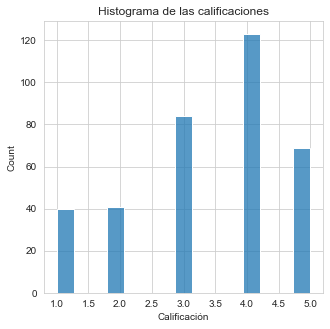

In [17]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "calificacion", data = BW_df)
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [18]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.2f}%".format(i, procentaje))
    
print("Debe mejorar 46%")
print("Es bueno 53%")

Porcentaje con calificación 1 es 0.11%
Porcentaje con calificación 2 es 0.11%
Porcentaje con calificación 3 es 0.24%
Porcentaje con calificación 4 es 0.34%
Porcentaje con calificación 5 es 0.19%
Debe mejorar 46%
Es bueno 53%


In [19]:
BW_df

,calificacion,opinion,mes,año,retroalimentacion
0,4,Este hotel será mi tercera vez en este hotel. ...,3,2011,1
1,2,"Bueno, me esperaba mucho más de lo que me di...",1,2009,0
2,4,La ubicación de este hotel no puede ser mejo...,11,2008,1
3,3,Esta era nuestra segunda estancia en el Majest...,6,2008,0
4,5,Actualmente me alojo aquí día 4 de 6 en el h...,1,2008,1
...,...,...,...,...,...
352,2,"Es céntrico si, su rótulo es pequeño y no visi...",11,2019,0
353,2,"Nadaaa que ver este hotel,no hay estacionamien...",9,2019,0
354,4,"Es un edificio de varios siglos, agradable los...",10,2019,1
355,4,"excelente servicio del personal, pero a las ha...",10,2019,1


In [70]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("calificacion", axis = 1, inplace = True)

<AxesSubplot:>

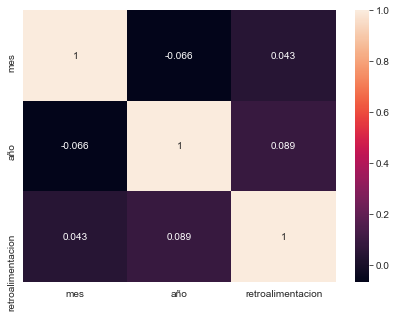

In [71]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

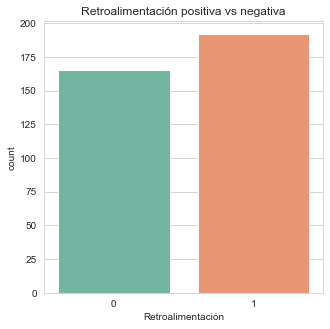

In [72]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

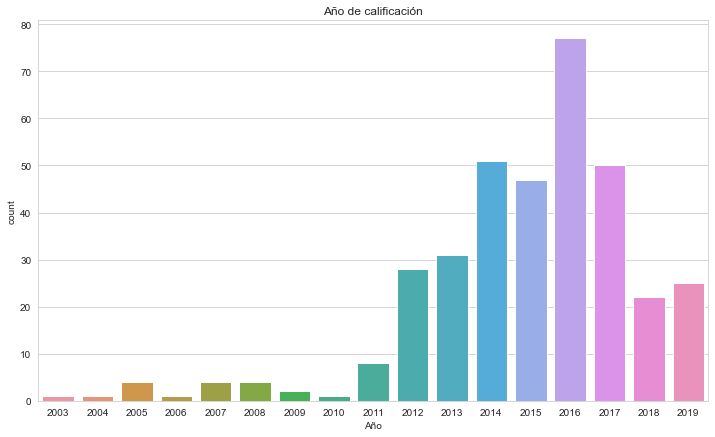

In [73]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

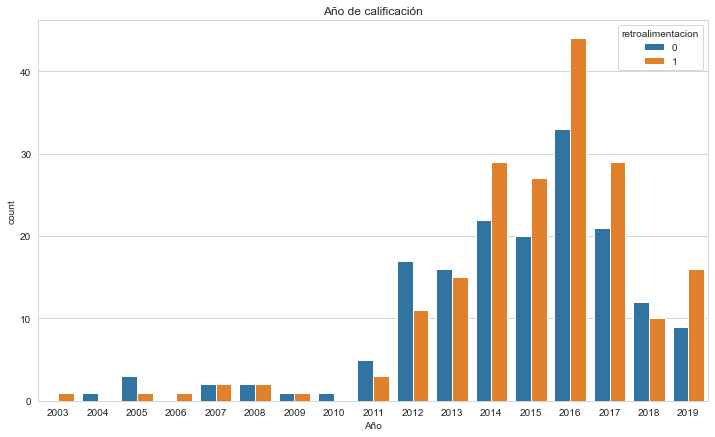

In [74]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

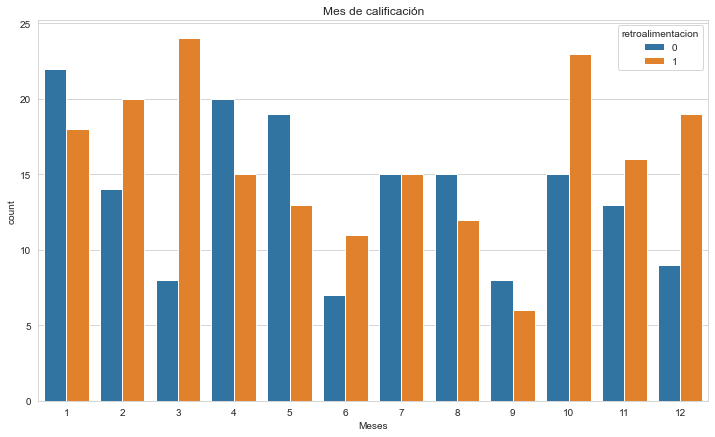

In [75]:
# ¿Hay una relación con los meses?
plt.figure(figsize = (12,7))
sns.countplot(x = "mes", data =  BW_df, hue = "retroalimentacion")
plt.title("Mes de calificación")
plt.xlabel("Meses")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

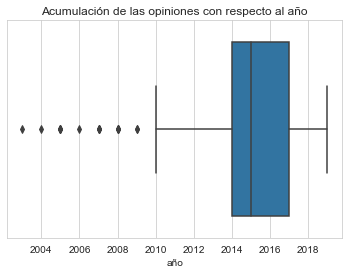

In [91]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [77]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")

In [79]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [80]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [81]:
opiniones = []
for phrase in BW_df["opinion"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [82]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [83]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [84]:
# Sustituirimos la variable opinion con las nuevas
BW_df["opinion"] = clean_opinions

In [85]:
BW_df

,opinion,mes,año,retroalimentacion
0,tercera vez razón volveremos todas comodidades...,3,2011,1
1,Bueno esperaba dieron pareció sentimiento gene...,1,2009,0
2,ubicación puede ser mejor ¡También cosita ruid...,11,2008,1
3,segunda estancia Majestic primera vez dieron h...,6,2008,0
4,Actualmente alojo aquí día necesita renovación...,1,2008,1
...,...,...,...,...
352,céntrico si rótulo pequeño visible infraestruc...,11,2019,0
353,Nadaaa ver hotelno estacionamientoel personal ...,9,2019,0
354,edificio varios siglos agradable espacios como...,10,2019,1
355,excelente servicio personal habitaciones hace ...,10,2019,1


In [86]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["opinion"][i]
    else:
        malas += BW_df["opinion"][i]

In [87]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

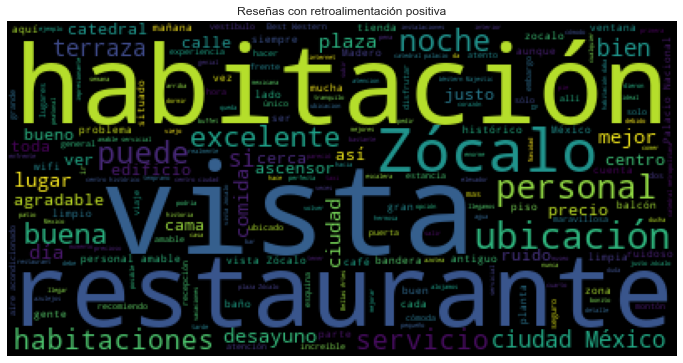

In [88]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

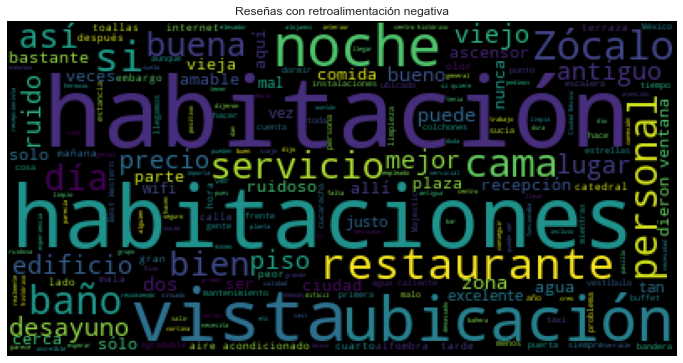

In [92]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [90]:
# Guardamos la información pre procesada
BW_df.to_csv("BW_preprocesado.csv")

In [108]:
# Vemos el dataset original para ver las opiniones competas
original_df = pd.read_csv("./BestWesternHotelMajestic_Trip.csv", encoding = "utf8")

In [126]:
# Viendo opiniones con retroalimentación positiva con la palabra habitación
opiniones_buenas = []
# Viendo opiniones con retroalimentación negativa con la palabra habitación
opiniones_malas = []

# Buscamos todas las opiniones con la palabra habitación
opiniones = original_df.loc[original_df["opinion"].str.contains("habitacion")]

,calificacion,fecha,nombre,opinion
2,ui_bubble_rating bubble_40,noviembre de 2008,OtterWynn,La ubicación de este hotel no puede ser mejo...
4,ui_bubble_rating bubble_50,enero de 2008,Chris S,Actualmente me alojo aquí día 4 de 6 en el h...
5,ui_bubble_rating bubble_30,febrero de 2012,matman830,"El lugar necesita renovación, fi-la conexión f..."
6,ui_bubble_rating bubble_30,enero de 2012,abtraveler_12,"Nos alojamos aquí en una tarifa muy reducida, ..."
7,ui_bubble_rating bubble_30,febrero de 2011,Rick049,Mi esposa y yo nos hemos alojado en el hotel M...
...,...,...,...,...
346,ui_bubble_rating bubble_40,mayo de 2019,Angel R,"Buen hotel, habitaciones limpias con camas cóm..."
347,ui_bubble_rating bubble_40,agosto de 2019,David F,"Hotel situado en la Plaza del Zócalo, la ubica..."
351,ui_bubble_rating bubble_50,julio de 2019,carolinacQ4807AZ,Buen servicio y excelente vista y ubicacion en...
354,ui_bubble_rating bubble_40,octubre de 2019,osanchezl2009,"Es un edificio de varios siglos, agradable los..."


In [127]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(original_df['calificacion']):
    new_cal = cali[-2:-1]
    original_df['calificacion'][i] = int(new_cal)
    
original_df["calificacion"] = original_df["calificacion"].astype(int)

In [133]:
original_df[original_df["calificacion"] >= 4]["opinion"]

0      Este hotel será mi tercera vez en este hotel. ...
2        La ubicación de este hotel no puede ser mejo...
4        Actualmente me alojo aquí día 4 de 6 en el h...
9      El único problema es el ruido de la calle o la...
13     Nos alojamos en este hotel histórico de 2011 N...
                             ...                        
346    Buen hotel, habitaciones limpias con camas cóm...
347    Hotel situado en la Plaza del Zócalo, la ubica...
351    Buen servicio y excelente vista y ubicacion en...
354    Es un edificio de varios siglos, agradable los...
355    excelente servicio del personal, pero a las ha...
Name: opinion, Length: 192, dtype: object

In [134]:
original_df[original_df["calificacion"] < 4]["opinion"]

1        Bueno, me esperaba mucho más de lo que me di...
3      Esta era nuestra segunda estancia en el Majest...
5      El lugar necesita renovación, fi-la conexión f...
6      Nos alojamos aquí en una tarifa muy reducida, ...
7      Mi esposa y yo nos hemos alojado en el hotel M...
                             ...                        
349    Terraza con vistas increíbles a la catedral pe...
350    La ubicación del hotel es bastante buena, pues...
352    Es céntrico si, su rótulo es pequeño y no visi...
353    Nadaaa que ver este hotel,no hay estacionamien...
356    El hotel tiene una excelente ubicación y ni ha...
Name: opinion, Length: 165, dtype: object

In [145]:
# Opiniones buenas
print(original_df["opinion"][2], end = "\n\n")
print(original_df["opinion"][4], end = "\n\n")
print(original_df["opinion"][9], end = "\n\n")

  La ubicación de este hotel no puede ser mejor. ¡También cosita que el ruido, trae tapones para los oídos y/o pedir por una habitación interior. Las habitaciones son anticuadas y podría usar un poco de trabajo, pero en general era cómodo y práctico. El carácter histórico de el hotel te da, algo de encanto. Las vistas desde el restaurante es increíble, en especial cuando hay actividad en el zócalo, que es todo el tiempo.  

  Actualmente me alojo aquí día 4 de 6 en el hotel necesita una renovación pero se siente justo. Yo estoy en una de las habitaciones en el 6o piso con un balcón y una increíble vista. El personal ha han hecho más de lo posible para mí más de una vez y es encomiable por eso! Si te gusta hoteles antiguos en lugares estupendos ¡éste es el lugar para ti!  

El único problema es el ruido de la calle o la otra habitación pero dormí muy bien después de que el día entero visita aquí y allá.



In [146]:
# Opiniones malas
print(original_df["opinion"][1], end = "\n\n")
print(original_df["opinion"][3], end = "\n\n")
print(original_df["opinion"][5], end = "\n\n")

  Bueno, me esperaba mucho más de lo que me dieron. Me pareció que el sentimiento general del lugar era dinero quitándonos. El personal no era muy amable ni servicial. Yo sé es un punto sin importancia pero yo le pedimos ellos 4 veces a reparar mi secador en mi habitación y que sólo lo hicimos´no me cansaría hacer. Tuve que pedir un par de veces para la una máquina de café que poner en mi habitación. Este lugar simplemente tuvimos una mala vibración. Es el tipo de lugar donde me imagino que le cobran por una estancia de noches si me alojé una minutos pasado la hora de salida.   Pero la ubicación es excelente. La habitación estaba muy bien pero por 50 libras por noche, hubiera esperado un poco más. No me volvería a alojar aquí.  

Esta era nuestra segunda estancia en el Majestic. La primera vez nos dieron una habitación que daba al zócolo, lo cual fue increíble. Nos encantó tener una vista de toda la actividad, incluyendo la bandera mexicana izar, lowering cada día. Nos hubiera leído un